You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

#Q1. Perform basic EDA 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading  the data from the CSV file
df = pd.read_csv(r"C:\Users\JOJO\Downloads\house_price.csv")

# Perform basic EDA

# 1. View the first few rows of the dataset
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [51]:
# 2. Check the structure and data types of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [57]:
# 3. Get summary statistics for numerical columns
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [59]:
# 4. Check for missing values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method


In [61]:


# Q2. Detect and remove outliers using different methods

# 1. Mean and Standard Deviation Method
def remove_outliers_mean_std(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    # Identify outliers beyond mean ± threshold * std
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply Mean and Standard Deviation method
df_mean_std = remove_outliers_mean_std(df, 'price_per_sqft')

# 2. Percentile Method
def remove_outliers_percentile(df, column, lower_percentile=1, upper_percentile=99):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_cleaned

# Apply Percentile method
df_percentile = remove_outliers_percentile(df, 'price_per_sqft')

# 3. IQR (Interquartile Range) Method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_cleaned

# Apply IQR method
df_iqr = remove_outliers_iqr(df, 'price_per_sqft')

# 4. Z-Score Method
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    df_cleaned = df[(np.abs(z_scores) < threshold)]
    return df_cleaned

# Apply Z-Score method
df_zscore = remove_outliers_zscore(df, 'price_per_sqft')

# Compare the results
print(f"Original DataFrame shape: {df.shape}")
print(f"After applying Mean and STD method: {df_mean_std.shape}")
print(f"After applying Percentile method: {df_percentile.shape}")
print(f"After applying IQR method: {df_iqr.shape}")
print(f"After applying Z-Score method: {df_zscore.shape}")


Original DataFrame shape: (13200, 7)
After applying Mean and STD method: (13195, 7)
After applying Percentile method: (12941, 7)
After applying IQR method: (11935, 7)
After applying Z-Score method: (13195, 7)


Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 



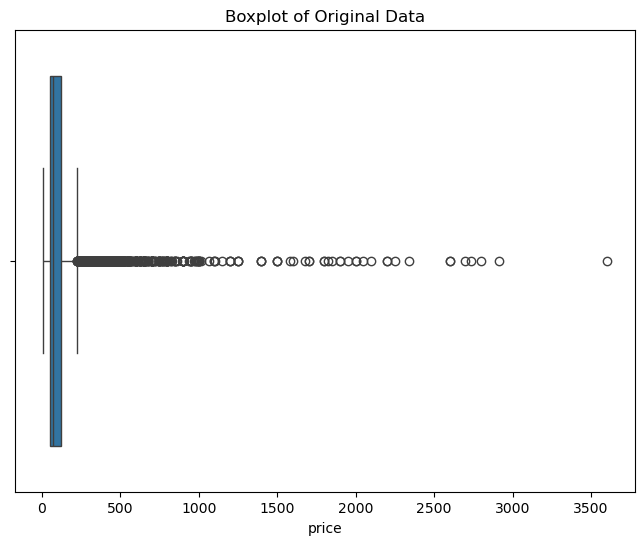

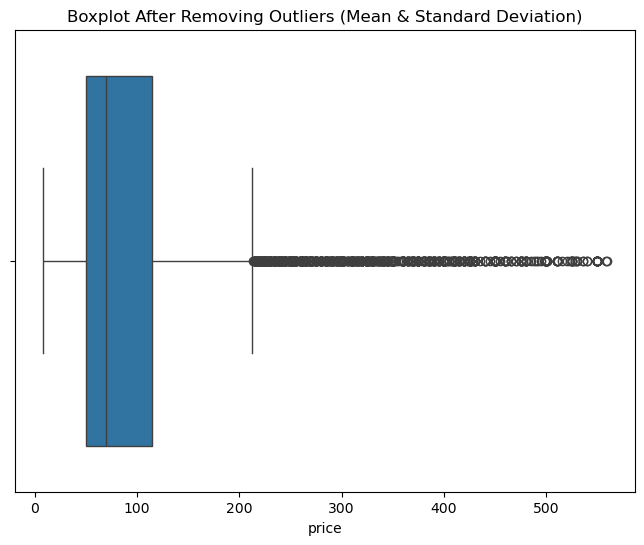

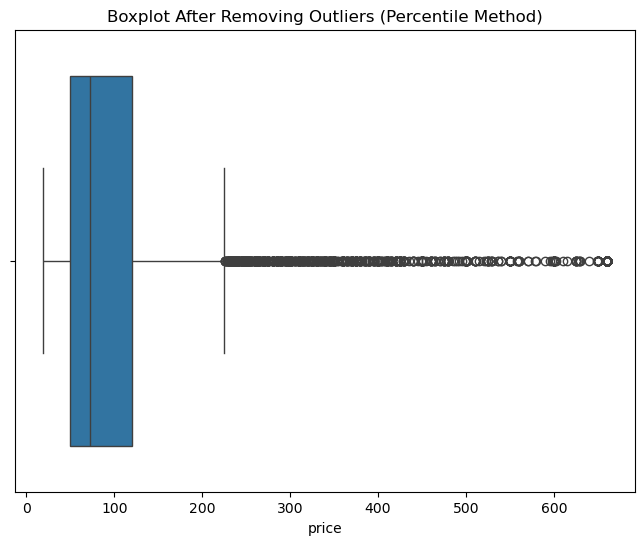

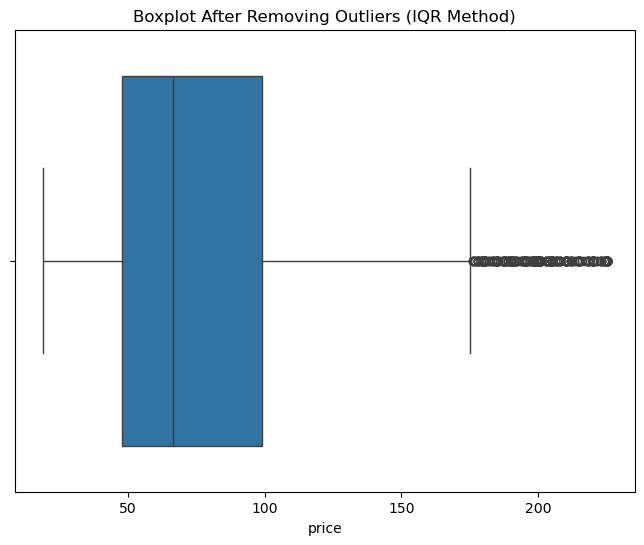

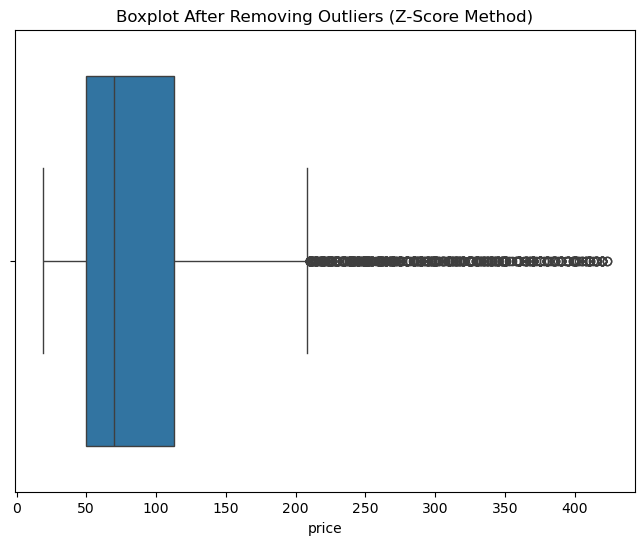

In [64]:
# Function to create boxplot
def create_boxplot(df, column, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Function to detect and remove outliers using Mean & Standard Deviation
def remove_outliers_mean_std(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    df_cleaned = df[(df[column] <= mean + threshold * std_dev) & (df[column] >= mean - threshold * std_dev)]
    return df_cleaned

# Function to detect and remove outliers using Percentile Method
def remove_outliers_percentile(df, column, lower_percentile=1, upper_percentile=99):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

# Function to detect and remove outliers using IQR Method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_cleaned

# Function to detect and remove outliers using Z-Score Method
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    df_cleaned = df[z_scores <= threshold]
    return df_cleaned

# 1. Create a box plot of the original data (before removing outliers)
create_boxplot(df, 'price', 'Boxplot of Original Data')

# 2. Apply the outlier removal methods
df_mean_std = remove_outliers_mean_std(df, 'price', threshold=3)
df_percentile = remove_outliers_percentile(df, 'price', lower_percentile=1, upper_percentile=99)
df_iqr = remove_outliers_iqr(df, 'price')
df_zscore = remove_outliers_zscore(df, 'price', threshold=3)

# 3. Create box plots for the cleaned data after outlier removal for each method
create_boxplot(df_mean_std, 'price', 'Boxplot After Removing Outliers (Mean & Standard Deviation)')
create_boxplot(df_percentile, 'price', 'Boxplot After Removing Outliers (Percentile Method)')
create_boxplot(df_iqr, 'price', 'Boxplot After Removing Outliers (IQR Method)')
create_boxplot(df_zscore, 'price', 'Boxplot After Removing Outliers (Z-Score Method)')


Z-score is better comparing with others

Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 


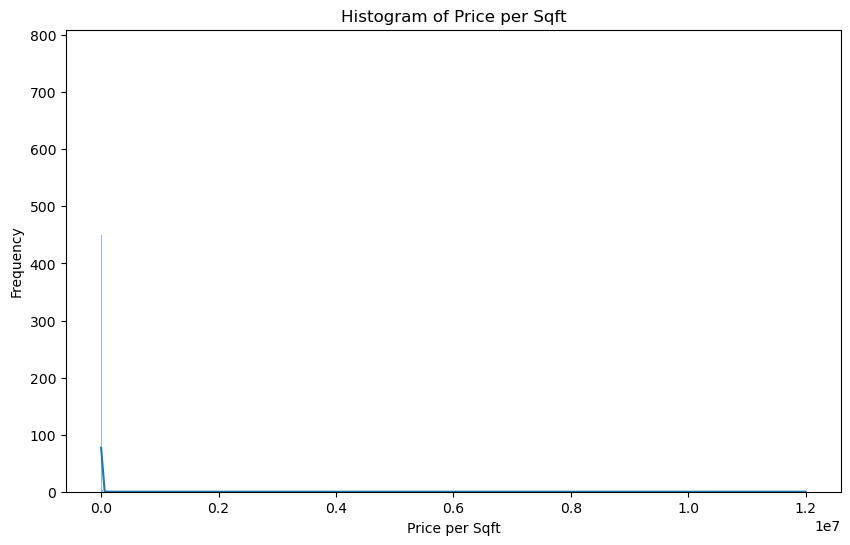

Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


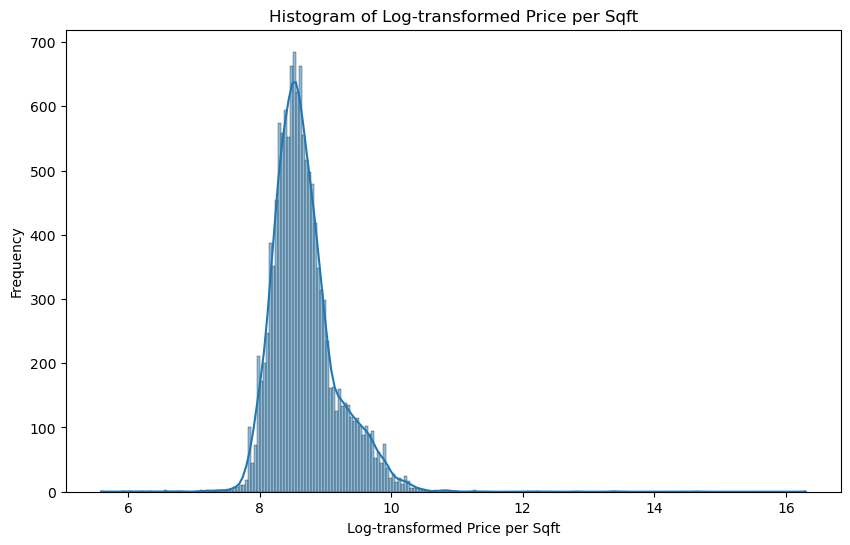

Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


In [68]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np
# Step 1: Visualize the distribution of the 'price_per_sqft' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Histogram of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Step 2: Checking skewness and kurtosis before any transformation
skewness_before = skew(df['price_per_sqft'], nan_policy='omit')
kurtosis_before = kurtosis(df['price_per_sqft'], nan_policy='omit')

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

# Step 3: If skewness is not close to 0, apply a transformation
# Apply log transformation to handle right skewness
df['price_per_sqft_log'] = np.log(df['price_per_sqft'] + 1)  # Adding 1 to avoid log(0)

# Step 4: Visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Histogram of Log-transformed Price per Sqft")
plt.xlabel("Log-transformed Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Step 5: Check skewness and kurtosis after the transformation
skewness_after = skew(df['price_per_sqft_log'], nan_policy='omit')
kurtosis_after = kurtosis(df['price_per_sqft_log'], nan_policy='omit')

print(f"Skewness after transformation: {skewness_after}")
print(f"Kurtosis after transformation: {kurtosis_after}")


Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)

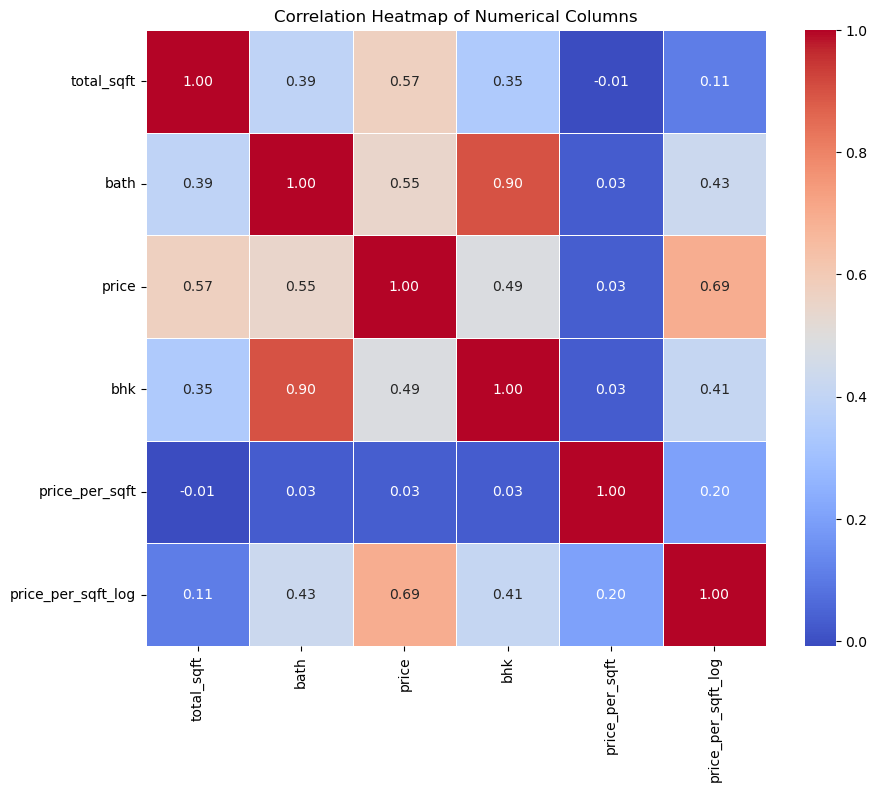

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking the  numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix
corr_matrix = df[numerical_cols].corr()

# Setting  up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plotting the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# to Show the plot
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


Q6. Draw Scatter plot between the variables to check the correlation between them


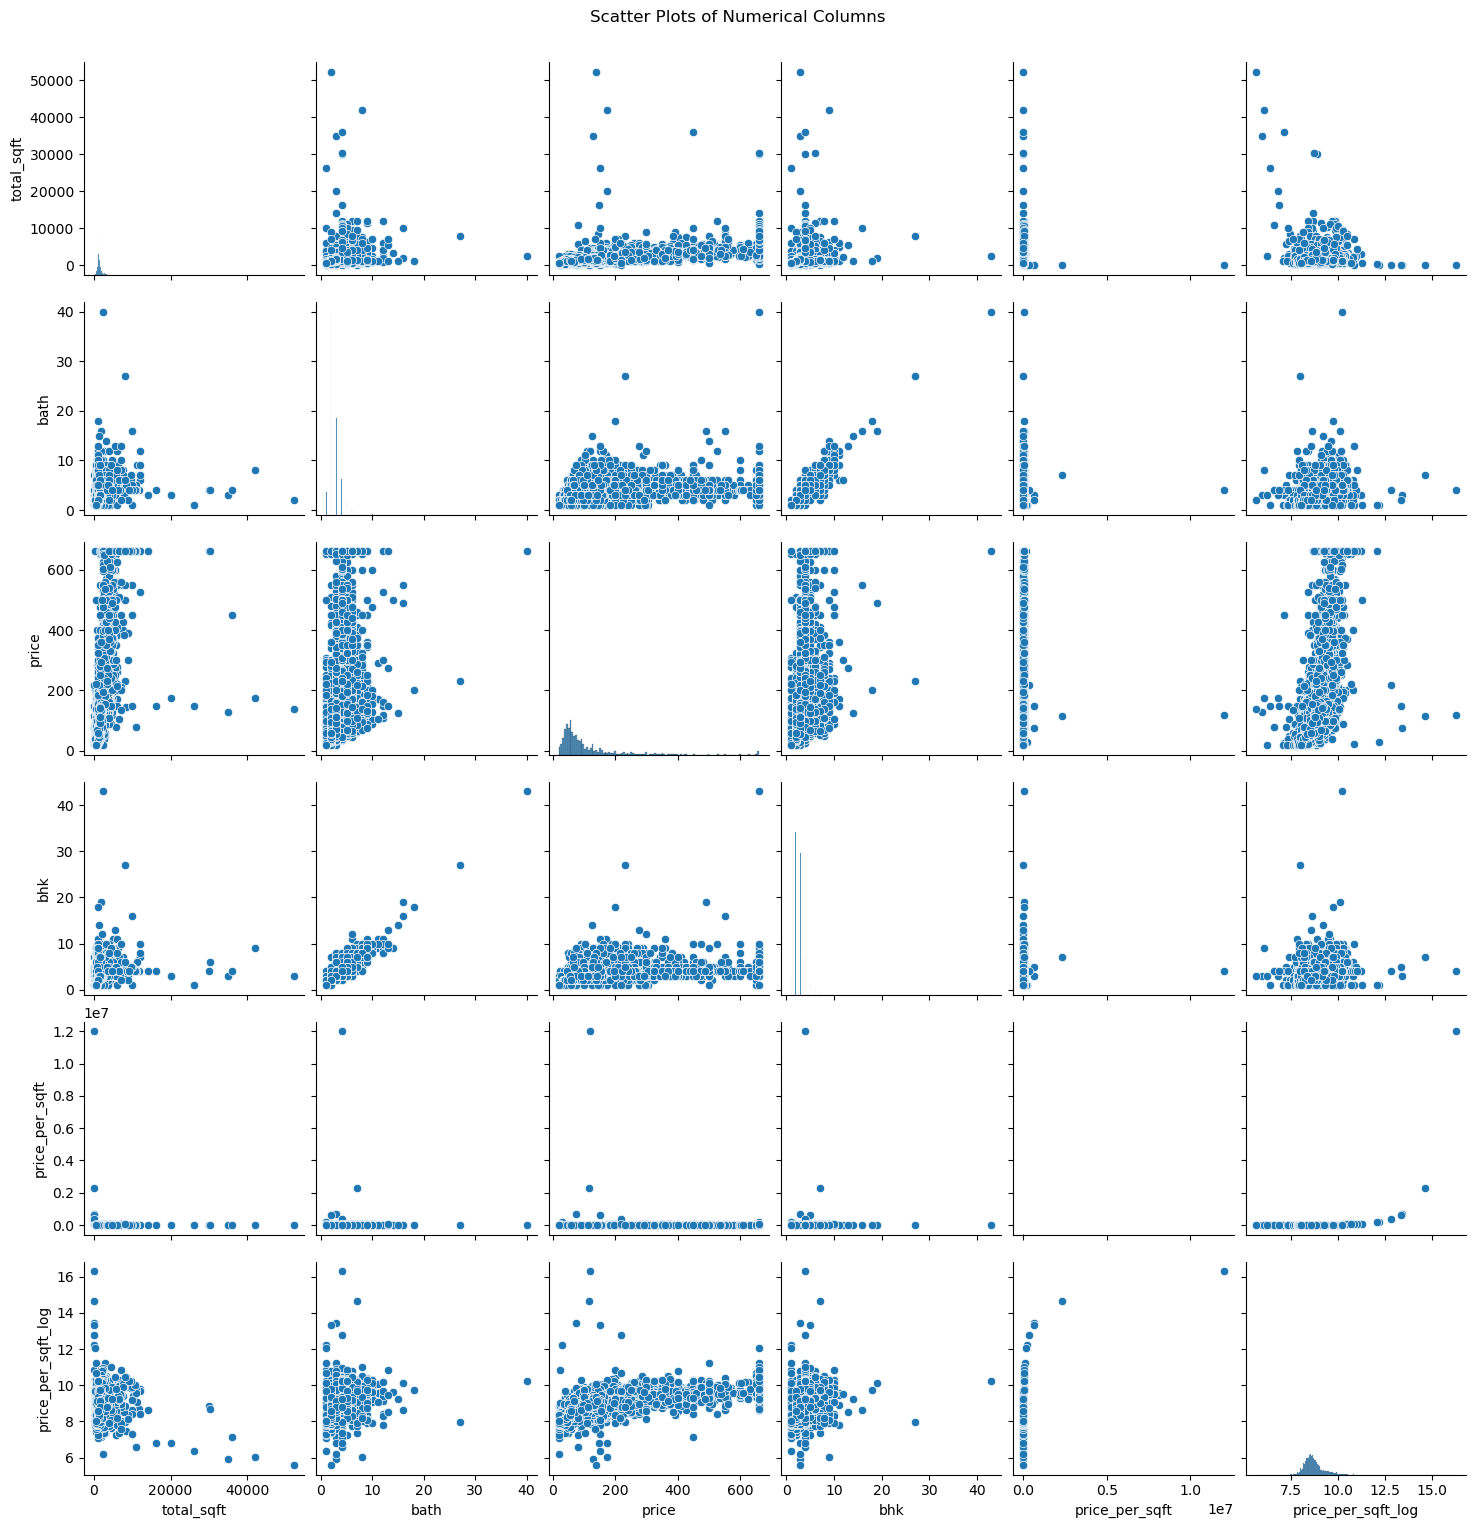

In [74]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create pairplot for all numerical columns to check correlations
sns.pairplot(df[numerical_cols])

# Display the plot
plt.suptitle('Scatter Plots of Numerical Columns', y=1.02)
plt.show()
